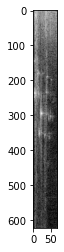

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "training_songs"
CATEGORIES = ['negatives', 'positives']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break
    

In [2]:
print(img_array.shape)

(623, 69)


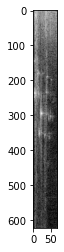

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (69, 623))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
training_data = []
neg_num = len(os.listdir('training_songs/negatives'))
pos_num = len(os.listdir('training_songs/positives'))
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                # new_array = cv2.resize(img_array, (69, 120))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

In [6]:
print(len(training_data))
training_data_negs = training_data[:neg_num]

training_data_pos = training_data[neg_num:]
print(len(training_data_pos))
import random
random.shuffle(training_data_negs)


37264
18632


In [7]:
training_data_negs = training_data_negs[:pos_num]
training_data = training_data_negs + training_data_pos
print(len(training_data))

37264


In [8]:
print(training_data[pos_num - 1][1])
print(training_data[pos_num][1])

0
1


In [9]:
import random

random.shuffle(training_data)

In [10]:
print(training_data[0][1])
print(training_data[0][0])

1
[[38 17 19 ... 55 55 47]
 [54 58 58 ... 58 61 51]
 [53 64 73 ... 31 43 26]
 ...
 [33 34  0 ... 12  0 32]
 [38 28 19 ... 14 21 44]
 [25 18 11 ... 32 37 41]]


In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)

print(np.shape(X[0]))
    
X = np.array(X).reshape(-1, 623, 69, 1)

(623, 69)


In [13]:
import pickle

pickle_out = open("lab_data_songsX.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("lab_data_songsy.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("lab_data_songsX.pickle","rb")
X = pickle.load(pickle_in)

In [16]:
pickle_in_y = open("lab_data_songsy.pickle","rb")
y = pickle.load(pickle_in_y)

[[[86]
  [93]
  [76]
  ...
  [88]
  [86]
  [72]]

 [[64]
  [85]
  [97]
  ...
  [88]
  [68]
  [63]]

 [[76]
  [81]
  [85]
  ...
  [73]
  [76]
  [83]]

 ...

 [[40]
  [59]
  [47]
  ...
  [56]
  [49]
  [57]]

 [[63]
  [59]
  [40]
  ...
  [41]
  [36]
  [55]]

 [[58]
  [34]
  [61]
  ...
  [14]
  [ 8]
  [45]]]


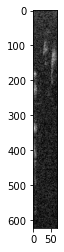

In [22]:
print(X[2])
img_test = X[5][1:]
plt.imshow(img_test, cmap="gray")

In [23]:
print(y[5])

0
